In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Add average temperature lines and legends
non_equil_T = 326.762
equil_T = 299.944

kb = 1.380649 * (10**-23)
n_atoms = 1231
normalization_target = 3 * n_atoms

#def freq_resolution_cm(timestep_fs, corr_len, sym=True):
#    c = 2.99792458e10  # speed of light in cm/s
#    T = timestep_fs * 1e-15 * corr_len
#    df = 1 / T / c
#    return df / 2 if sym else df
#
#freq_res = freq_resolution_cm(4, 500)


def Read_Two_Column_File(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            y.append(float(p[1]))

    return x, y

def normalize_to_target(lst, target_sum):
    total = sum(lst)
    return [x * (target_sum / total) for x in lst]

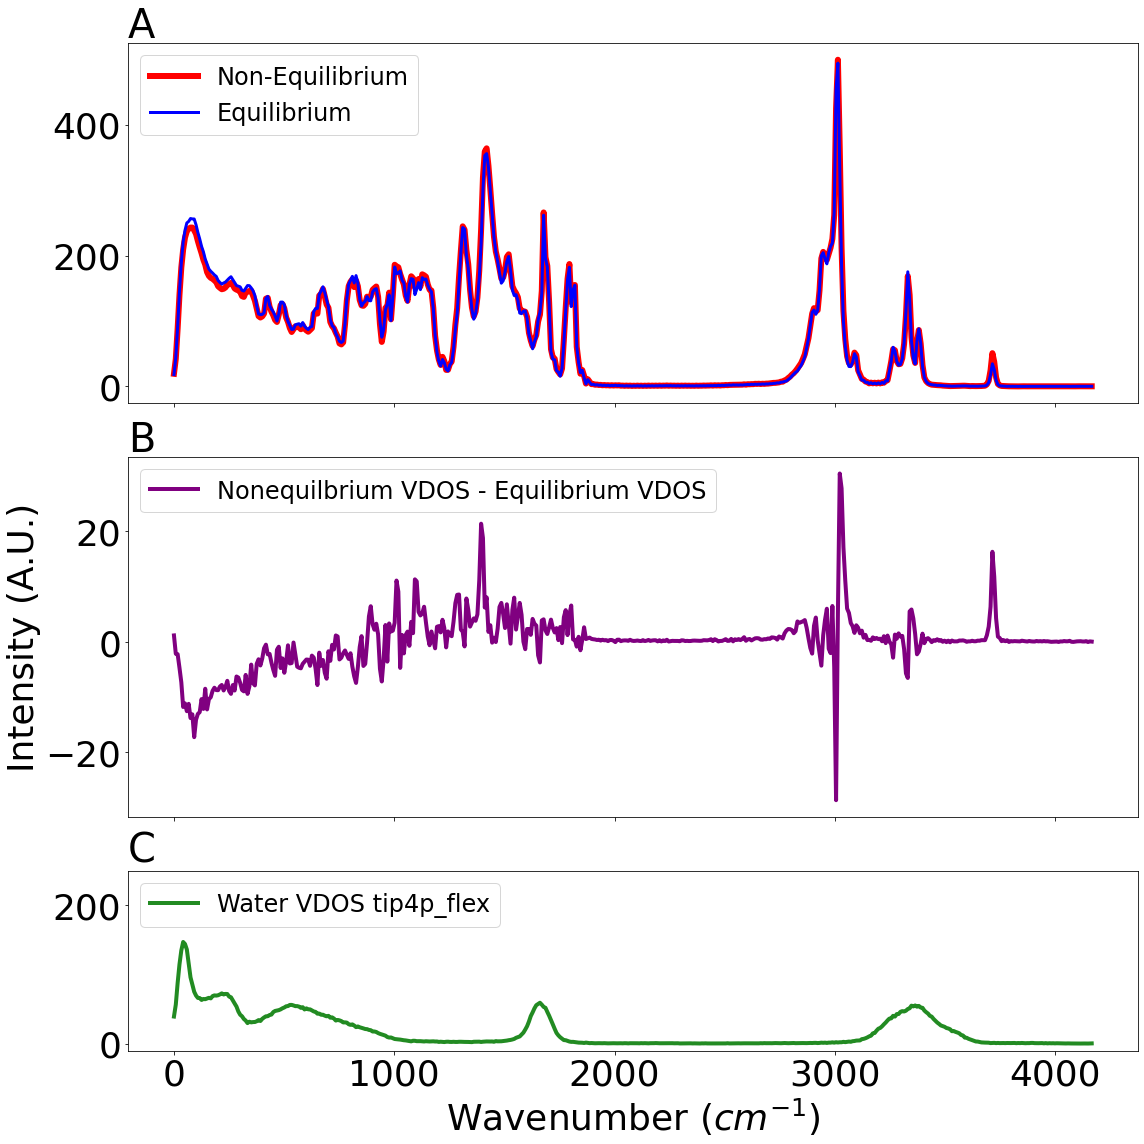

In [2]:
water_data = np.array(Read_Two_Column_File("../data/VDOS_water.dat"))

equil_data = Read_Two_Column_File('../data/equil_VDOS.dat')
norm_equil_data = normalize_to_target(equil_data[1], normalization_target*10)
non_equil_data = Read_Two_Column_File('../data/non_equil_VDOS.dat')
norm_non_equil_data = normalize_to_target(non_equil_data[1], normalization_target*10)

# Compute difference
difference = np.subtract(norm_non_equil_data, norm_equil_data)

# Create a three-panel figure
fig, axs = plt.subplots(3, 1, figsize=(16, 16), sharex=True, gridspec_kw={'height_ratios': [2, 2, 1]})

# Panel A: Equilibrium and Non-Equilibrium VDOS
axs[0].plot(non_equil_data[0], norm_non_equil_data, color='red', label='Non-Equilibrium', linewidth=6)
axs[0].plot(equil_data[0], norm_equil_data, color='blue', label='Equilibrium', linewidth=3)
axs[0].legend(fontsize=24, loc='upper left')
#axs[0].set_ylabel("Intensity (A.U.)", fontsize=36)
axs[0].set_title("A", fontsize=40, loc='left')
axs[0].tick_params(axis='both', labelsize=36)

# Panel B: Difference in VDOS
axs[1].plot(equil_data[0], difference, color='purple', linewidth=4,label='Nonequilbrium VDOS - Equilibrium VDOS')
axs[1].legend(fontsize=24)
axs[1].set_ylabel("Intensity (A.U.)", fontsize=36)
axs[1].set_title("B", fontsize=40, loc='left')
axs[1].tick_params(axis='both', labelsize=36)

# Panel C: Non-Equilibrium Water VDOS
axs[2].plot(water_data[0], water_data[1], color='forestgreen', linewidth=4, label='Water VDOS tip4p_flex')
axs[2].legend(fontsize=24, loc = 'upper left')
axs[2].set_xlabel("Wavenumber ($cm^{-1}$)", fontsize=36)
#axs[2].set_ylabel("VDOS", fontsize=36)
axs[2].set_title("C", fontsize=40, loc='left')
axs[2].tick_params(axis='both', labelsize=36)
axs[2].set_ylim(-10,250)

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('VDOS_combined.png', dpi=250)
